<a href="https://colab.research.google.com/github/thanachin/exxon/blob/main/Inbound_%26_Outbound_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
In = pd.read_csv('/content/inbound_group (2).csv')
In

,INBOUND_YEAR,INBOUND_MONTH,NET_QUANTITY_MT,NET_QUANTITY_KT
0,2023,11,2070.915,2.071
1,2023,12,6249.175,6.249
2,2024,1,7417.125,7.417
3,2024,2,6425.926,6.426
4,2024,3,11515.263,11.515
5,2024,4,8655.925,8.656
6,2024,5,10996.603,10.997
7,2024,6,8059.525,8.060
8,2024,7,7877.959,7.878
9,2024,8,9739.409,9.739


In [ ]:
Out = pd.read_csv('/content/outbound_group (2).csv')
Out

,OUTBOUND_YEAR,OUTBOUND_MONTH,NET_QUANTITY_MT,NET_QUANTITY_KT
0,2023,12,119.625,0.120
1,2024,1,25674.885,25.675
2,2024,2,16321.775,16.322
3,2024,3,23532.305,23.532
4,2024,4,23166.160,23.166
5,2024,5,25495.910,25.496
6,2024,6,25371.840,25.372
7,2024,7,26473.480,26.473
8,2024,8,25489.110,25.489
9,2024,9,30131.255,30.131


In [ ]:
# Rename columns to prepare for merging
In.rename(columns={'INBOUND_YEAR': 'YEAR', 'INBOUND_MONTH': 'MONTH'}, inplace=True)
Out.rename(columns={'OUTBOUND_YEAR': 'YEAR', 'OUTBOUND_MONTH': 'MONTH'}, inplace=True)

# Merge the two dataframes based on YEAR and MONTH
merged_df = pd.merge(In, Out, on=['YEAR', 'MONTH'], how='outer')

# Display the merged dataframe
display(merged_df)

,YEAR,MONTH,NET_QUANTITY_MT_x,NET_QUANTITY_KT_x,NET_QUANTITY_MT_y,NET_QUANTITY_KT_y
0,2023,11,2070.915,2.071,NaN,NaN
1,2023,12,6249.175,6.249,119.625,0.120
2,2024,1,7417.125,7.417,25674.885,25.675
3,2024,2,6425.926,6.426,16321.775,16.322
4,2024,3,11515.263,11.515,23532.305,23.532
5,2024,4,8655.925,8.656,23166.160,23.166
6,2024,5,10996.603,10.997,25495.910,25.496
7,2024,6,8059.525,8.060,25371.840,25.372
8,2024,7,7877.959,7.878,26473.480,26.473
9,2024,8,9739.409,9.739,25489.110,25.489


In [ ]:
merged_df.dropna(inplace=True)
display(merged_df)

,YEAR,MONTH,NET_QUANTITY_MT_x,NET_QUANTITY_KT_x,NET_QUANTITY_MT_y,NET_QUANTITY_KT_y
1,2023,12,6249.175,6.249,119.625,0.120
2,2024,1,7417.125,7.417,25674.885,25.675
3,2024,2,6425.926,6.426,16321.775,16.322
4,2024,3,11515.263,11.515,23532.305,23.532
5,2024,4,8655.925,8.656,23166.160,23.166
6,2024,5,10996.603,10.997,25495.910,25.496
7,2024,6,8059.525,8.060,25371.840,25.372
8,2024,7,7877.959,7.878,26473.480,26.473
9,2024,8,9739.409,9.739,25489.110,25.489
10,2024,9,7924.525,7.925,30131.255,30.131


In [ ]:
merged_df['DATE'] = pd.to_datetime(merged_df['YEAR'].astype(str) + '-' + merged_df['MONTH'].astype(str) + '-01')
merged_df.set_index('DATE', inplace=True)
time_series_data = merged_df[['NET_QUANTITY_KT_x', 'NET_QUANTITY_KT_y']]
display(time_series_data)

,NET_QUANTITY_KT_x,NET_QUANTITY_KT_y
DATE,,
2023-12-01,6.249,0.120
2024-01-01,7.417,25.675
2024-02-01,6.426,16.322
2024-03-01,11.515,23.532
2024-04-01,8.656,23.166
2024-05-01,10.997,25.496
2024-06-01,8.060,25.372
2024-07-01,7.878,26.473
2024-08-01,9.739,25.489


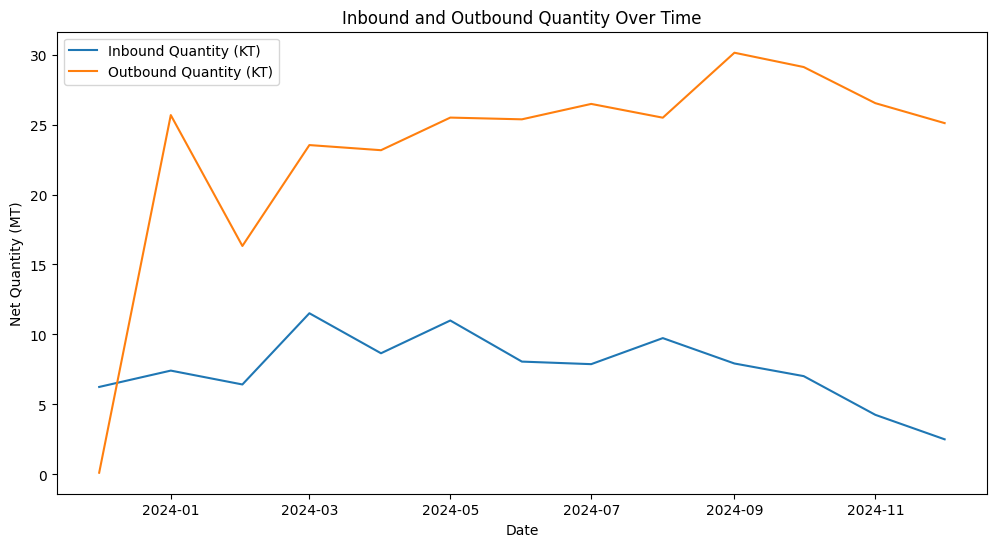

ADF Statistics for Inbound Quantity: -0.05087345215463837
p-value for Inbound Quantity: 0.9541171638661007
Inbound Quantity is likely non-stationary.
ADF Statistics for Outbound Quantity: -2.8155605817519547
p-value for Outbound Quantity: 0.0560851973091221
Outbound Quantity is likely non-stationary.


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['NET_QUANTITY_KT_x'], label='Inbound Quantity (KT)')
plt.plot(time_series_data['NET_QUANTITY_KT_y'], label='Outbound Quantity (KT)')
plt.title('Inbound and Outbound Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Net Quantity (MT)')
plt.legend()
plt.show()

from statsmodels.tsa.stattools import adfuller

def check_stationarity(series, name):
    result = adfuller(series)
    print(f'ADF Statistics for {name}: {result[0]}')
    print(f'p-value for {name}: {result[1]}')
    if result[1] <= 0.05:
        print(f"{name} is likely stationary.")
    else:
        print(f"{name} is likely non-stationary.")

check_stationarity(time_series_data['NET_QUANTITY_KT_x'], 'Inbound Quantity')
check_stationarity(time_series_data['NET_QUANTITY_KT_y'], 'Outbound Quantity')

In [ ]:
time_series_data['time'] = np.arange(len(time_series_data))

X = time_series_data[['time']]
y = time_series_data[['NET_QUANTITY_KT_x', 'NET_QUANTITY_KT_y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


/tmp/ipython-input-47-315834124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['time'] = np.arange(len(time_series_data))


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse_x = mean_squared_error(y_test['NET_QUANTITY_KT_x'], y_pred[:, 0])
r2_x = r2_score(y_test['NET_QUANTITY_KT_x'], y_pred[:, 0])

mse_y = mean_squared_error(y_test['NET_QUANTITY_KT_y'], y_pred[:, 1])
r2_y = r2_score(y_test['NET_QUANTITY_KT_y'], y_pred[:, 1])

print(f"Mean Squared Error (NET_QUANTITY_KT_x): {mse_x}")
print(f"R-squared (NET_QUANTITY_KT_x): {r2_x}")
print(f"Mean Squared Error (NET_QUANTITY_MT_y): {mse_y}")
print(f"R-squared (NET_QUANTITY_KT_y): {r2_y}")

Mean Squared Error (NET_QUANTITY_KT_x): 6.434720808446069
R-squared (NET_QUANTITY_KT_x): -1.86252442141107
Mean Squared Error (NET_QUANTITY_MT_y): 158.81248929005278
R-squared (NET_QUANTITY_KT_y): 0.11276759602410058


## Summary:

### Data Analysis Key Findings

*   Both inbound and outbound quantity time series are likely non-stationary based on the ADF test (p-values 0.954 and 0.056 respectively).
*   A linear regression model trained on the time series data using time as a feature performed poorly, especially for 'NET\_QUANTITY\_MT\_x' with a negative R-squared score (-1.86).
*   The model showed limited explanatory power for 'NET\_QUANTITY\_MT\_y', with an R-squared of approximately 0.113.

### Insights or Next Steps

*   Given the poor performance of the linear regression model and the likely non-stationarity of the series, explore alternative time series forecasting methods that can handle non-stationary data, such as differencing and applying ARIMA models, or consider more robust models like Prophet if sufficient data becomes available.
*   With only 13 data points, the reliability of any complex time series model is limited. Gathering more data points is crucial for building a more accurate and reliable forecasting model.
